In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import urllib3
from sklearn.utils import shuffle
%matplotlib inline

In [2]:
df=pd.read_csv('/Users/chiaentsai/Library/Containers/com.microsoft.Excel/Data/Desktop/wine.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
test_data=df.groupby(0).sample(n=18)
train_data=df.drop(test_data.index)

In [4]:
test_data.to_csv('wine_test.csv',index=False,header=False)
train_data.to_csv('wine_train.csv',index=False,header=False)

In [5]:
train_data=shuffle(train_data)
X_train=train_data.drop([0],axis=1)
Y_train=train_data[[0]]
X_test=test_data.drop([0],axis=1)
Y_test=test_data[[0]]

In [6]:
'''
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
'''

'\nfrom sklearn.naive_bayes import GaussianNB\nmodel=GaussianNB()\n'

In [7]:
'''
model.fit(X_train,Y_train.values.flatten())
print('The score of the model:',model.score(X_test,Y_test.values.flatten()))
'''

"\nmodel.fit(X_train,Y_train.values.flatten())\nprint('The score of the model:',model.score(X_test,Y_test.values.flatten()))\n"

In [8]:
import warnings

from abc import ABCMeta, abstractmethod


import numpy as np
from scipy.special import logsumexp

In [17]:
class GaussianNB():
    

 
    def __init__(self, *, priors=None, var_smoothing=1e-9):
        self.priors = priors
        self.var_smoothing = var_smoothing

    def fit(self, X, y, sample_weight=None):
        
        return self._partial_fit(X, y, np.unique(y), _refit=True,
                                 sample_weight=sample_weight)

    def _check_X(self, X):
        return check_array(X)

  
    def _update_mean_variance(n_past, mu, var, X, sample_weight=None):
       
        if X.shape[0] == 0:
            return mu, var

        # Compute (potentially weighted) mean and variance of new datapoints
        if sample_weight is not None:
            n_new = float(sample_weight.sum())
            new_mu = np.average(X, axis=0, weights=sample_weight)
            new_var = np.average((X - new_mu) ** 2, axis=0,
                                 weights=sample_weight)
        else:
            n_new = X.shape[0]
            new_var = np.var(X, axis=0)
            new_mu = np.mean(X, axis=0)

        if n_past == 0:
            return new_mu, new_var

        n_total = float(n_past + n_new)

        total_mu = (n_new * new_mu + n_past * mu) / n_total

        old_ssd = n_past * var
        new_ssd = n_new * new_var
        total_ssd = (old_ssd + new_ssd +
                     (n_new * n_past / n_total) * (mu - new_mu) ** 2)
        total_var = total_ssd / n_total

        return total_mu, total_var

    def partial_fit(self, X, y, classes=None, sample_weight=None):
        
        return self._partial_fit(X, y, classes, _refit=False,
                                 sample_weight=sample_weight)

    def _partial_fit(self, X, y, classes=None, _refit=False,
                     sample_weight=None):
       
        X, y = check_X_y(X, y)
        if sample_weight is not None:
            sample_weight = _check_sample_weight(sample_weight, X)

        self.epsilon_ = self.var_smoothing * np.var(X, axis=0).max()

        if _refit:
            self.classes_ = None

        if _check_partial_fit_first_call(self, classes):
           
            n_features = X.shape[1]
            n_classes = len(self.classes_)
            self.theta_ = np.zeros((n_classes, n_features))
            self.sigma_ = np.zeros((n_classes, n_features))

            self.class_count_ = np.zeros(n_classes, dtype=np.float64)

            if self.priors is not None:
                priors = np.asarray(self.priors)
                # Check that the provide prior match the number of classes
                if len(priors) != n_classes:
                    raise ValueError('Number of priors must match number of'
                                     ' classes.')
                # Check that the sum is 1
                if not np.isclose(priors.sum(), 1.0):
                    raise ValueError('The sum of the priors should be 1.')
                # Check that the prior are non-negative
                if (priors < 0).any():
                    raise ValueError('Priors must be non-negative.')
                self.class_prior_ = priors
            else:
                # Initialize the priors to zeros for each class
                self.class_prior_ = np.zeros(len(self.classes_),
                                             dtype=np.float64)
        else:
            if X.shape[1] != self.theta_.shape[1]:
                msg = "Number of features %d does not match previous data %d."
                raise ValueError(msg % (X.shape[1], self.theta_.shape[1]))
            # Put epsilon back in each time
            self.sigma_[:, :] -= self.epsilon_

        classes = self.classes_

        unique_y = np.unique(y)
        unique_y_in_classes = np.in1d(unique_y, classes)

        if not np.all(unique_y_in_classes):
            raise ValueError("The target label(s) %s in y do not exist in the "
                             "initial classes %s" %
                             (unique_y[~unique_y_in_classes], classes))

        for y_i in unique_y:
            i = classes.searchsorted(y_i)
            X_i = X[y == y_i, :]

            if sample_weight is not None:
                sw_i = sample_weight[y == y_i]
                N_i = sw_i.sum()
            else:
                sw_i = None
                N_i = X_i.shape[0]

            new_theta, new_sigma = self._update_mean_variance(
                self.class_count_[i], self.theta_[i, :], self.sigma_[i, :],
                X_i, sw_i)

            self.theta_[i, :] = new_theta
            self.sigma_[i, :] = new_sigma
            self.class_count_[i] += N_i

        self.sigma_[:, :] += self.epsilon_

        # Update if only no priors is provided
        if self.priors is None:
            # Empirical prior, with sample_weight taken into account
            self.class_prior_ = self.class_count_ / self.class_count_.sum()

        return self



In [18]:
model=GaussianNB()
model.fit(X_train,Y_train.values.flatten())
print('The score of the model:',model.score(X_test,Y_test.values.flatten()))

NameError: name 'check_X_y' is not defined

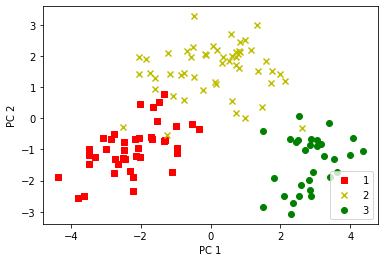

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

cov_mat = np.cov(X_train_std.T)  #求共變異係數矩陣

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)  #求共變異係數矩陣的特徵向量及特徵值

tot = sum(eigen_vals)  #計算解釋變異數比率 各特徵值/特徵值總和
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt

eigen_pairs =[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

first = eigen_pairs[0][1]
second = eigen_pairs[1][1]
first = first[:,np.newaxis]
second = second[:,np.newaxis]
w = np.hstack((first,second))

#畫散點圖
X_train_pca = X_train_std.dot(w)
colors = ['r', 'y', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(Y_train), colors, markers):
    plt.scatter(X_train_pca[(Y_train.values==l).flatten(), 0], X_train_pca[(Y_train.values==l).reshape(-1), 1], c=c, label=l, marker=m) # 散點圖

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower right')
plt.show()

In [11]:
Y_train.values.reshape(-1)

array([2, 2, 3, 1, 2, 2, 2, 1, 3, 2, 2, 1, 2, 2, 1, 3, 3, 1, 3, 2, 2, 3,
       1, 3, 2, 2, 1, 2, 1, 1, 3, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       2, 1, 1, 2, 2, 3, 2, 1, 1, 2, 1, 3, 1, 2, 1, 1, 2, 2, 1, 3, 1, 2,
       1, 1, 2, 3, 3, 3, 1, 2, 3, 1, 1, 3, 3, 2, 1, 1, 3, 3, 3, 2, 2, 1,
       2, 2, 1, 2, 3, 1, 2, 3, 1, 2, 3, 2, 3, 2, 1, 3, 3, 2, 1, 2, 3, 3,
       1, 3, 1, 1, 3, 2, 2, 2, 1, 2, 1, 2, 2, 2])